 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/08/08.ipynb#Jednovýběrový-t-test" data-toc-modified-id="Jednovýběrový-t-test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Jednovýběrový t-test</a></span></li><li><span><a href="http://localhost:8888/notebooks/08/08.ipynb#Nezávislý-dvouvýběrový-t-test" data-toc-modified-id="Nezávislý-dvouvýběrový-t-test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nezávislý dvouvýběrový t-test</a></span></li><li><span><a href="http://localhost:8888/notebooks/08/08.ipynb#Párový-dvouvýběrový-test" data-toc-modified-id="Párový-dvouvýběrový-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Párový dvouvýběrový test</a></span></li><li><span><a href="http://localhost:8888/notebooks/08/08.ipynb#Life-Goals" data-toc-modified-id="Life-Goals-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Life Goals</a></span></li></ul></div>

# Testování základních statistických hypotéz

V této lekci si na několika příkladech ukážeme a vysvětlíme testování nejběžnějších statistických hypotéz. V žádném případě se nejedná o vyčerpávající seznam metod pro všechny situace, ale pouhý základ pro případy, se kterými se ve vědě setkáváme asi nejčastěji. Kompletnější a ucelenější seznam metod a situací, ve kterých se různé testování statistických hypotéz používá, lze nalézt [na stránkách](https://stats.idre.ucla.edu/other/mult-pkg/whatstat/) Institute for Digital Research and Education, University of California.

## Jednovýběrový t-test

Nejjednodušším statistickým testem je pravděpodobně jednovýběrový t-test na průměr, ve kterém lze testovat následující *alternativní hypotézy*:

$H_1:\ \mu\ \ne\ \mu_0$

$H_1:\ \mu\ >\ \mu_0$

$H_1:\ \mu\ <\ \mu_0$

proti *nulové hypotéze*, která je definovaná takto:

$H_0:\ \mu\ =\ \mu_0$

Při jednovýběrovém t-testu se tedy snažíte na určité hladině pravděpodobnosti dokázat, že skutečný populační průměr $\mu$  je jiný než ten očekávaný, $\mu_0$. Z t-testu tedy vyplývá, zda můžete tvrdit, že prvky vašeho vzorku pocházejí z jiné než předpokládané populace.

Jednovýběrový t-test vychází z definice intervalu spolehlivosti pro průměr a jeho tzv. *testovací statistika* má následující tvar:

$t = \frac{\overline{x} - \mu_0}{s/\sqrt{n}}$

Pokud si vzpomínáte na interval spolehlivosti tak, jak byl definován v předchozí lekci, víte, že hodnota $t$ odpovídá velikosti chyby, kterou při našem odhadu z konkrétního vzorku s určitou pravděpodobností uděláme vlivem náhodných jevů. U statistikého testu tedy chceme naopak vědět hodnotu $t$ v případě hypotetického populačního průměru $\mu_0$. Hodnota $t$ vlastně určuje maximální velikost intervalu spolehlivosti, který ještě neobsahuje hodnotu $\mu_0$ a lze tak zamítnout nulovou hypotézu, neboť ta se zamítá pouze pokud $\mu_0$ leží mimo specifikovaný interval.

Hodnota $t$, neboli testovací statistika, též určuje tzv. p-hodnotu ($p$), což je maximální hladina pravděpodobnosti (*statistické významnosti*), při které ještě můžeme nulovou hypotézu zamítnout. Pokud bychom tedy vytvořili více než (1-$p$)% interval spolehlivosti, už bychom nemohli $H_0$ zamítnout, neboť by obsahoval i hodnotu $\mu_0$.

V předchozí lekci jste měli za [úkol](../07/ukoly/07_zadani.ipynb) sestavit interval spolehlivosti pro objem piva, který vyteče do lahve z vašeho prehistorického plnícího stroje. Pojďme si teď ověřit, zda není náhodou možné o našem stroji tvrdit, že šidí naše zákazníky a že z něj v průměru vytéká méně než deklarovaných 500 ml.

Nulovou hypotézou v našem případě bude:

$H_0:\ \mu\ =\ 500$

tedy, že stroj nešidí zákazníky a dělá přesně to, co má. Naší alternativní hypotézu pak sestavíme takto:

$H_1:\ \mu\ <\ 500$

tedy, že stroj plní lahve pod míru. 

V tomto konkrétním testu se tedy snažíme dokázat, že náš stroj šidí zákazníky. Pro náš test zvolíme hladinu významnosti 1%, což je šance, že chybně přijmeme $H_1$ za předpokladu, že $H_0$ platí (tzv. *chyba prvního řádu*).  Pokud tedy sestavíme příslušný jednostranný 99% interval spolehlivosti pro průměr, tedy interval ${\displaystyle \left(-\infty, t^{*}{\sigma  \over {\sqrt {n}}}\right) }$, máme šanci 1%, že skutečný průměr se v tomto intervalu nacházet nebude a my chybně $H_0$ zamítneme. $H_0$ bychom totiž mohli zamítnout pouze tehdy, pokud interval spolehlivosti neobsahuje deklarovanou hodnotu 500 ml.

Přejděme teď však již k samotnému výpočtu a ověřme si, jak na tom náš stroj asi je:

In [1]:
# načtení dat
mereni <- read.table("../07/ukoly/plnici_stroj.csv")$Volume

# určení jednostranného 99% intervalu spolehlivosti
x <- mean(mereni) # průměr vzorku
s <- sd(mereni) # směrodatná odchylka vzorku
N <- length(mereni) # počet měření
sem <- s / sqrt(N) # střední chyba průměru
df <- length(mereni) - 1 # počet stupňů volnosti příslušného t-rozdělení
t_99 <- qt(0.99, df = df) # příslušná hodnota t

# interval spolehlivosti
c(
    -Inf
    , x + (t_99 * sem)
)

[1]     -Inf 505.6495

Hodnota 500 ml tedy do 99% intervalu spolehlivosti patří. Nemůžeme o našem stroji tedy na hladině významnosti 1% tvrdit, že by systematicky šidil naše zákazníky. To je dobrý výsledek, ale mějte na paměti, že to *neznamená* automatické přijmutí nulové hypotézy. Výsledek testu znamená pouze to, že nemáme dostatek důkazů na to, abychom mohli spolehlivé tvrdit, že $H_0$ není pravdivá a platí $H_1$. Hladina významnosti testu je totiž pouze pravděpodobnost chyby prvního řádu (Type I error) za předpokladu, že nulová hypotéza platí. Výsledek testu nám tedy vůbec nic neříká o platnosti nulové hypotézy. Platnost nulové hypotézy je pouze náš předpoklad a test nám v tomto ohledu neposkytuje pro toto žádný důkaz.

Určení intervalu spolehlivosti je tedy jednou z možností jak provést tento test, ale v praxi běžnou metodou je postup přes výpočet testovací statistiky, kterou jsme si výše uvedli jako:

$t = \frac{\overline{x} - \mu_0}{s/\sqrt{n}}$

My si ji zde za použití proměnných výše můžeme spočítat například takto:

In [2]:
t <- (x - 500) / sem
t

[1] -1.520463

Odpovídající p-hodnotu bychom pak snadno získali z distribuční funkce:

In [3]:
p <- pt(t, df = df)
p

[1] 0.07243113

Toto je tedy minimální hodnota statistické významnosti, na které bychom mohli zamítnout $H_0$. Tato hodnota je větší než námi požadovaná statistická významnost testu (7.2% oproti 1%), a proto nelze $H_0$ v našem případě zamítnout. Stačilo by nám tedy například sestrojit pouze asi 92.76% interval spolehlivosti na to, aby hodnotu 500 ml neobsahoval:

In [4]:
(1 - p) * 100
c(
    -Inf
    , x + (abs(t) * sem)
)

[1] 92.75689

[1] -Inf  500

V R máme samozřejmě funkce, které nám testování statistických hypotéz usnadňují, a my tak často nebudeme muset ani znát přesný tvar testovací statistiky. V předchozí lekci jsme si již trochu předtavili funkci `t.test`, která umožňuje nejen testování ale i výpočet intervalu spolehlivosti. V našem případě bychom výsledek našeho testu získali jednoduše takto:

In [5]:
t.test(mereni, mu = 500, alternative = "less", conf.level = 0.99)


	One Sample t-test

data:  mereni
t = -1.5205, df = 19, p-value = 0.07243
alternative hypothesis: true mean is less than 500
99 percent confidence interval:
     -Inf 505.6495
sample estimates:
mean of x 
 491.5705 


Funkci tedy stačí jako první argument poslat naše data a dále jen dalšími argumenty specifikovat $\mu_0$, tvar alternativní hypotézy a hladinu významnosti. 

Výstupem funkce ve skutečnosti není řetězec, jak by se mohlo zdát, ale objekt:

In [6]:
result <- t.test(mereni, mu = 500, alternative = "less", conf.level = 0.99)
class(result)

[1] "htest"

Jedná se o jakýsi objekt třídy `htest`. Pokud jej pošleme funkci `print` jako parameter dostaneme stejný výstup jako nahoře:

In [7]:
print(result)


	One Sample t-test

data:  mereni
t = -1.5205, df = 19, p-value = 0.07243
alternative hypothesis: true mean is less than 500
99 percent confidence interval:
     -Inf 505.6495
sample estimates:
mean of x 
 491.5705 



Funkce `print` se totiž dokáže objektu třídy `htest` zeptat na jeho textovou reprezentaci a tu potom vrátí, což je výstup, který vidíme nahoře. Objekt `htest` si můžeme představit jako takový lepší seznam, který obsahuje všechny detaily o výpočtu. Stejně jako u seznamů lze jména jednotlivých položek zjistit pomocí funkce `names`:

In [8]:
names(result)

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
[6] "null.value"  "alternative" "method"      "data.name"

Objektu se tedy můžeme přímo zeptat na vypočtenou testovací statistiku:

In [9]:
result$statistic

t 
-1.520463

počet stupňů volnosti:

In [10]:
result$parameter

df 
19

p-hodnotu:

In [11]:
result$p.value

[1] 0.07243113

interval spolehlivosti:

In [12]:
result$conf.int

[1]     -Inf 505.6495
attr(,"conf.level")
[1] 0.99

odhad populačního průměru ze vzorku, tj. průměr z měření:

In [13]:
result$estimate
x

mean of x 
 491.5705

[1] 491.5705

hodnotu průměru v nulové hypotéze:

In [14]:
result$null.value

mean 
 500

variantu alternativní hypotézy:

In [15]:
result$alternative

[1] "less"

variantu t-testu:

In [16]:
result$method

[1] "One Sample t-test"

a název proměnné, která obsahovala data pro test:

In [17]:
result$data.name

[1] "mereni"

Většina funkcí pro statistické testování v R vrací výsledek jako podobný objekt, takže pokud potřebujete zpracovávat výsledky testování automaticky, máte to většinou v R velice snadné. V praxi je použití takových funkcí velice vhodné, neboť jejich použití je zpravidla méně náchylné na chyby než explicitní použití vzorečků. 

Uveďme si teď ještě na závěr, jak by probíhal tento test v případě jiné alternativní hypotézy. Řekněme, že bychom se snažili dokázat, že náš stroj nedělá svou práci spolehlivě, tzn. testovat obsoustrannou alternativní hypotézu:

$H_1:\ \mu\ \ne\ \mu_0$

Snažíme se tedy dokázat, že stroj neplní lahve na požadovanou hodnotu, tedy že je buď přeplňuje nebo naopak plní pod míru. V podání funkce `t.test` bude test vypadat následovně:

In [18]:
t.test(mereni, mu = 500, alternative = "two.sided", conf.level = 0.99)


	One Sample t-test

data:  mereni
t = -1.5205, df = 19, p-value = 0.1449
alternative hypothesis: true mean is not equal to 500
99 percent confidence interval:
 475.7094 507.4316
sample estimates:
mean of x 
 491.5705 


Funkci `t.test` bychom mohli zavolat i bez parametru pro alternativní hypotézu. Režim "two.sided" je totiž výchozí nastavení:

In [19]:
t.test(mereni, mu = 500, conf.level = 0.99)


	One Sample t-test

data:  mereni
t = -1.5205, df = 19, p-value = 0.1449
alternative hypothesis: true mean is not equal to 500
99 percent confidence interval:
 475.7094 507.4316
sample estimates:
mean of x 
 491.5705 


Výchozí hladina významnosti je pak 5%:

In [20]:
result <- t.test(mereni, mu = 500)
result


	One Sample t-test

data:  mereni
t = -1.5205, df = 19, p-value = 0.1449
alternative hypothesis: true mean is not equal to 500
95 percent confidence interval:
 479.9667 503.1743
sample estimates:
mean of x 
 491.5705 


Všimněte si, že se sníženou hladinou významnosti se nám zúžil interval spolehlivosti (odhad je přesnější, ale riziko chyby je větší). Pokud bychom použili hodnotu stejnou je naše p-hodnota, měli bychom dostat interval, který už hodnotu 500 ml těsně neobsahuje:

In [21]:
t.test(
    mereni
    , mu = 500
    , conf.level=1-result$p.value
)


	One Sample t-test

data:  mereni
t = -1.5205, df = 19, p-value = 0.1449
alternative hypothesis: true mean is not equal to 500
85.51377 percent confidence interval:
 483.141 500.000
sample estimates:
mean of x 
 491.5705 


Je tomu tedy skutečně tak a interval spolehlivosti hodnotu 500 ml neobsahuje (interval je oboustranně otevřený, takže do něj hodnota 500 ml nespadá). Vyšší hladina spolehlivosti by již vedla k zahrnutí $\mu_0$, a tedy by již nešlo $H_1$ přijmout:

In [22]:
t.test(
    mereni
    , mu = 500
    , conf.level=1-(result$p.value - 0.0001)
)


	One Sample t-test

data:  mereni
t = -1.5205, df = 19, p-value = 0.1449
alternative hypothesis: true mean is not equal to 500
85.52377 percent confidence interval:
 483.1388 500.0022
sample estimates:
mean of x 
 491.5705 


## Nezávislý dvouvýběrový t-test

Dvouvýběrový t-test slouží k porovnání průměrů dvou nezávislých výběrů. Můžeme tak tedy zjistit, zda se lze spolehlivě domnívat, že náhodná veličina nabývá v obou případech různých hodnot. Nulová a alternativní hypotéza má v tomto případě následující tvar:

$H_0:\ \mu_1\ =\ \mu_2$

$H_1:\ \mu_1\ \ne\ \mu_2$

Testovací statistika je pak v nejobecnější podobě následující:

${\displaystyle t={{\overline {X}}_{1}-{\overline {X}}_{2} \over {\displaystyle {\sqrt {{s_{1}^{2} \over n_{1}}+{s_{2}^{2} \over n_{2}}}}}}}$

Stupně volnosti příslušného t rozdělení se pak vypočtou takto:

$ \mathrm{d.f.} = \frac{(s_1^2/n_1 + s_2^2/n_2)^2}{(s_1^2/n_1)^2/(n_1-1) + (s_2^2/n_2)^2/(n_2-1)}$

Říkáme "v nejobecnější podobě", neboť existuje i zjednodušená varianta, která předpokládá rovnost směrodatných odchylek obou vzorků (viz [wiki](https://en.wikipedia.org/wiki/Student's_t-test#Independent_two-sample_t-test)). Pokud máte dobrý důvod se domnívat, že tento předpoklad platí, je vhodné tuto metodu použít, neboť to znamená větší sílu testu. My však budeme v této lekci používat tzv. Welchův test, který je sice více konzervativní, ale pro jeho použití není platnost tohoto předpokladu nutná.

V příkladu, na kterém si nezávislý dvouvýběrový t-test ukážeme, se opět vrátíme k Albertovi Michelsonovi a jeho experimentům s měřením rychlosti světla z [předchozí lekce](../07/). Michelson totiž v roce 1882 provedl nové měření, ale s jiným experimentálním uspořádáním ([S.M. Stigler, "Do Robust Estimators Work with Real Data?", The Annals of Statistics,1977, pp 1055-1098](http://darp.lse.ac.uk/PapersDB/Stigler_&#40;AnnStat_77&#41;.pdf)). Pojďme teď tedy zjistit, jak mu nová měření vyšla a zda jeho nový experiment skutečně vedl k jiným výsledkům než ten předchozí. Data z obou měření máme k dispozici v souboru `light_speed.csv`:

In [23]:
df_lightspeed <- read.table(
    "light_speed.csv"
    , header = T
)
head(df_lightspeed)
tail(df_lightspeed)

Y1879,Y1882
850,883
740,816
900,778
1070,796
930,682
850,711


,Y1879,Y1882
95,810,NA
96,940,NA
97,950,NA
98,800,NA
99,810,NA
100,870,NA


Je vidět, že v roce 1882 Albert zřejmě provedl měření méně, neboť naše tabulka v některých polích na konci obsahuje neznámé hodnoty. Pojďme teď za pomoci funkce `is.na` zjistit, kolik měření tedy v roce 1882 provedl: 

In [24]:
sum(!is.na(df_lightspeed$Y1882))

[1] 23

Albert tedy v roce 1882 provedl pouhých 23 měření. 

Pojďme si teď data uložit do dvou vektorů a podíváme se na každý experiment podrobněji:

In [25]:
lightspeed_1879 <- df_lightspeed$Y1879
lightspeed_1882 <- df_lightspeed$Y1882[!is.na(df_lightspeed$Y1882)]

Podívejme se nejprve na histogramy obou měření:

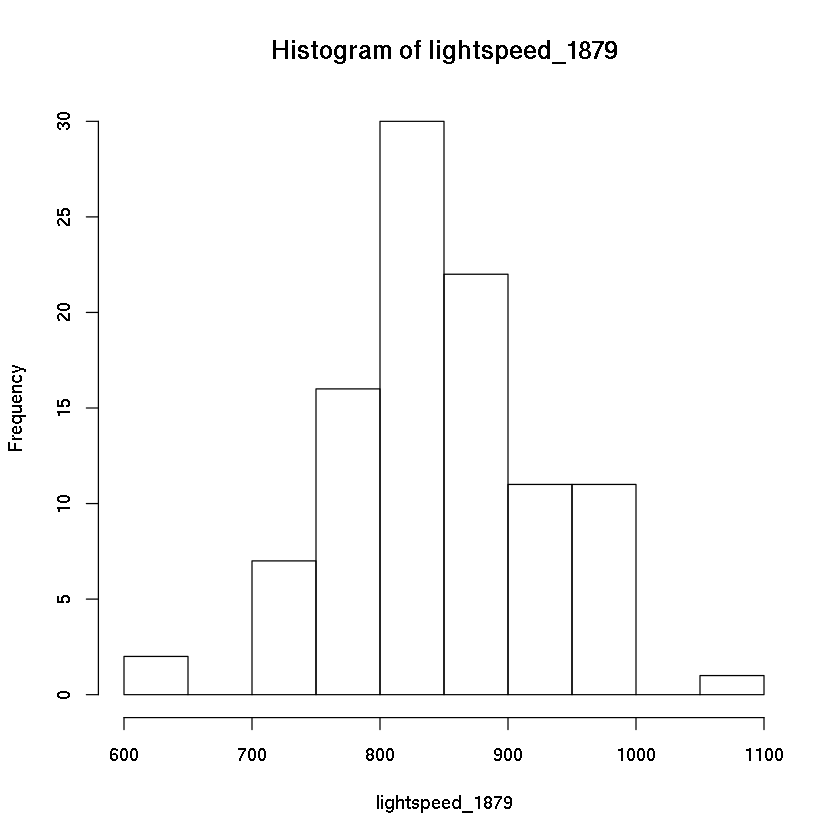

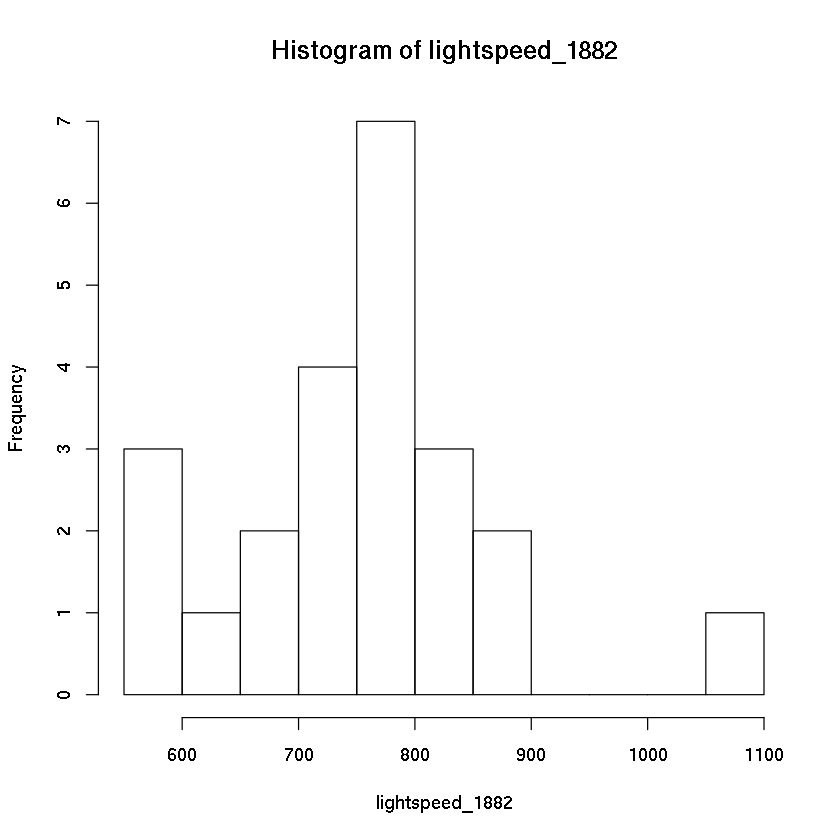

In [26]:
hist(lightspeed_1879, breaks = 15)
hist(lightspeed_1882, breaks = 15)

Z histogramů můžeme odhadnout, že rychlosti naměřené v roce 1882 byly zřejmě o něco nižší než v roce 1879.

Jedním ze způsobů jak porovnat dva vzorky a distribuce získaných hodnot trochu více podrobněji je vykreslení proložených hustot pravděpodobnosti. K tomu slouží funkce `density`, která vrací speciální objekt obsahující dva vektory (`x` a `y`), které reprezentují spočtené hodnoty proložené hustoty (`y`) pro různé hypotetické hodnoty rychlosti světla (`x`):

In [27]:
dens_1879 <- density(lightspeed_1879)
dens_1882 <- density(lightspeed_1882)

class(dens_1879)
head(dens_1879$x)
head(dens_1879$y)

[1] "density"

[1] 551.8167 552.9642 554.1117 555.2592 556.4067 557.5542

[1] 1.996886e-06 2.317978e-06 2.678919e-06 3.106506e-06 3.587038e-06
[6] 4.124592e-06

Takto získané hodnoty si můžeme zobrazit pomocí jednoduchého grafu a nejčastěji naměřené hodnoty v obou případech mezi sebou porovnat:

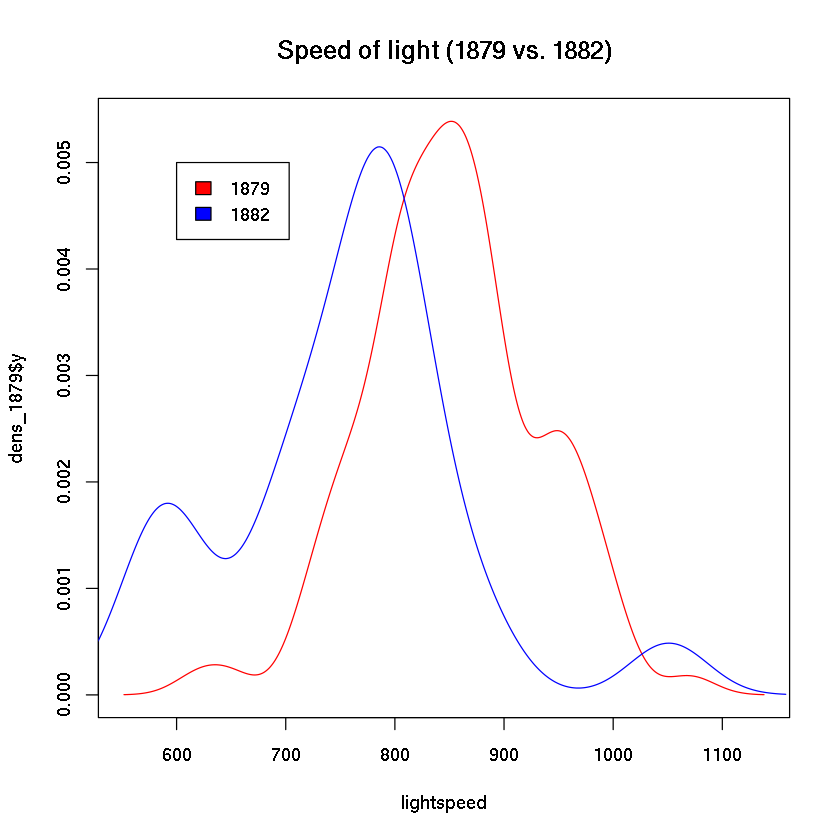

In [28]:
plot(
    dens_1879$x
    , dens_1879$y
    , xlab = "lightspeed"
    , col = "red"
    , main = "Speed of light (1879 vs. 1882)"
    , type = "l"
)
lines(dens_1882$x, dens_1882$y, col = "blue")

# umístění legendy do grafu
legend(600, 0.005, c("1879", "1882"), fill = c("red", "blue"))

Vidíme tedy, že v roce 1882 skutečně došlo ve většině případů k naměření nižších hodnot než v roce 1879. Je však tento rozdíl statisticky významný? Odpověď na tuto otázku nám opět poskytne funkce `t.test`:

In [29]:
t.test(lightspeed_1879, lightspeed_1882)


	Welch Two Sample t-test

data:  lightspeed_1879 and lightspeed_1882
t = 4.0598, df = 27.754, p-value = 0.0003625
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  47.63387 144.73135
sample estimates:
mean of x mean of y 
 852.4000  756.2174 


Jelikož v tomto případě jde vlastně o konstrukci intervalu spolehlivosti pro rozdíl obou průměrů, můžeme z výstupu nahoře vyčíst, že na hladině pravděpodobnosti 5% můžeme nulovou hypotézu, $\mu_1\ -\ \mu_2\ =\ 0$, zamítnout, neboť vypočtený interval spolehlivosti nulu neobsahuje. Zároveň můžeme vidět, že nulovou hypotézu bychom zamítli i na hladině pravděpodobnosti 1%, neboť vypočtená p-hodnota je menší než 0.01. Není tedy pochyb o tom, že rozdíl v obou metodách je statisticky významný.

Zbývá už jen otázka, zda se Albert v roce 1882 svým měřením přiblížil hodnotě skutečné. Zjistili bychom to spočtením intervalu spolehlivosti:

In [30]:
t.test(lightspeed_1882)


	One Sample t-test

data:  lightspeed_1882
t = 33.858, df = 22, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 709.8976 802.5372
sample estimates:
mean of x 
 756.2174 


a porovnáním se skutečnou hodnotou získanou z moderních výpočtů, která je pro tento experiment [710.5](http://darp.lse.ac.uk/PapersDB/Stigler_(AnnStat_77).pdf). Skutečná hodnota se tedy vejde do 95% intervalu spolehlivosti získaném z Albertových dat, a tudíž bychom mohli tvrdit, že se ve svém odhadu trefil. Nicméně všimněte si, že v porovnání s rokem 1879 je tento interval spolehlivosti mnohem širší, což je především kvůli nedostatku dat z roku 1882:

In [31]:
t.test(lightspeed_1879)


	One Sample t-test

data:  lightspeed_1879
t = 107.88, df = 99, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 836.7226 868.0774
sample estimates:
mean of x 
    852.4 


V roce 1882 se tedy Albert trefil, ale jeho měření jsou spojená s mnohem větší nejistotou. Mohlo by se tedy stát, že pokud by Albert v roce 1882 provedl měření více, snížil by tak střední chybu průměru a mi bychom zjistili, že skutečnou rychlost nebyl schopen přesně změřit ani v tomto experimentu a že jeho metoda opět rychlost světla nadhodnotila.

## Párový dvouvýběrový test

TODO

https://en.wikipedia.org/wiki/Student's_t-test#Independent_two-sample_t-test

## Life Goals

In [32]:
life_goals <- read.table(
    "life_goals.csv"
    , sep = "\t"
    , header = T
    , colClasses = c(
        rep("factor", 7)
        , rep("numeric", 4)
    )
)
head(life_goals)

Gender,Grade,Age,Race,Urban.Rural,School,Goals,Grades,Sports,Looks,Money
boy,5,11,White,Rural,Elm,Sports,1,2,4,3
boy,5,10,White,Rural,Elm,Popular,2,1,4,3
girl,5,11,White,Rural,Elm,Popular,4,3,1,2
girl,5,11,White,Rural,Elm,Popular,2,3,4,1
girl,5,10,White,Rural,Elm,Popular,4,2,1,3
girl,5,11,White,Rural,Elm,Popular,4,2,1,3


In [33]:
sort(as.numeric(levels(life_goals$Age)))

[1]  7  9 10 11 12 13

In [34]:
life_goals_split <- split(life_goals, life_goals$Gender)
boys <- life_goals_split$boy
girls <- life_goals_split$girl

In [35]:
head(boys)
nrow(boys)

,Gender,Grade,Age,Race,Urban.Rural,School,Goals,Grades,Sports,Looks,Money
1,boy,5,11,White,Rural,Elm,Sports,1,2,4,3
2,boy,5,10,White,Rural,Elm,Popular,2,1,4,3
13,boy,4,9,White,Rural,Elm,Popular,2,3,4,1
14,boy,4,9,White,Rural,Elm,Popular,4,2,3,1
15,boy,4,9,Other,Rural,Elm,Popular,4,3,2,1
30,boy,4,10,White,Suburban,Brentwood Elementary,Grades,1,2,4,3


[1] 227

In [36]:
head(girls)
nrow(girls)

,Gender,Grade,Age,Race,Urban.Rural,School,Goals,Grades,Sports,Looks,Money
3,girl,5,11,White,Rural,Elm,Popular,4,3,1,2
4,girl,5,11,White,Rural,Elm,Popular,2,3,4,1
5,girl,5,10,White,Rural,Elm,Popular,4,2,1,3
6,girl,5,11,White,Rural,Elm,Popular,4,2,1,3
7,girl,5,10,White,Rural,Elm,Popular,3,4,1,2
8,girl,5,10,White,Rural,Elm,Grades,3,4,2,1


[1] 251

In [37]:
boys_grades <- boys$Grades
girls_grades <- girls$Grades
mean(boys_grades)
mean(girls_grades)

[1] 2.651982

[1] 2.585657

In [38]:
min(boys_grades, girls_grades)
max(boys_grades, girls_grades)

[1] 1

[1] 4

In [39]:
table(life_goals$Grades, life_goals$Gender)

   
    boy girl
  1  39   55
  2  61   62
  3  67   66
  4  60   68

In [40]:
t.test(boys$Sports, girls$Sports)


	Welch Two Sample t-test

data:  boys$Sports and girls$Sports
t = -10.006, df = 475.67, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9782996 -0.6571323
sample estimates:
mean of x mean of y 
 1.656388  2.474104 
